# American Census

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Load data

In [9]:
X_train = pd.read_csv("AmericanCensus/X_train.csv")
y_train = pd.read_csv("AmericanCensus/y_train.csv")
X_test = pd.read_csv("AmericanCensus/X_test.csv")

### Data exploration

#### Question 3.1.1

In [10]:
# Aim to keep your answers structured for the reviewers
frames = [X_train, y_train]
data = pd.concat(frames, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16280 non-null  int64  
 1   education-num   16040 non-null  float64
 2   hours-per-week  16280 non-null  int64  
 3   workclass       15344 non-null  object 
 4   education       16280 non-null  object 
 5   marital-status  16280 non-null  object 
 6   occupation      15099 non-null  object 
 7   relationship    16280 non-null  object 
 8   race            16280 non-null  object 
 9   sex             16280 non-null  object 
 10  native-country  15980 non-null  object 
 11  salary          16280 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.5+ MB


### Data preparation

In [11]:
#clear the data and transform the data into numerical format
data.dropna(how='any',inplace=True)
X_test.dropna(how='any',inplace=True)
#data.info()

data.rename(columns={'native-country': 'nativecountry','hours-per-week': 'hoursperweek','marital-status': 'maritalstatus','education-num':'educationnum'}, inplace=True)
X_test.rename(columns={'native-country': 'nativecountry','hours-per-week': 'hoursperweek','marital-status': 'maritalstatus','education-num':'educationnum'}, inplace=True)
data.info()
data.workclass.unique()
data['workclass'] = data['workclass'].map({' Private':0, ' Federal-gov':1, ' Local-gov':2, ' Self-emp-not-inc':3,' State-gov':4, ' Self-emp-inc':5, ' Without-pay':6}).astype(int)
X_test['workclass'] = X_test['workclass'].map({' Private':0, ' Federal-gov':1, ' Local-gov':2, ' Self-emp-not-inc':3,' State-gov':4, ' Self-emp-inc':5, ' Without-pay':6}).astype(int)

#education
eu = np.array(data.education.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
data['education'] = data['education'].map(res).astype(int)

eu = np.array(X_test.education.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
X_test['education'] = X_test['education'].map(res).astype(int)
#marital-status
eu = np.array(data.maritalstatus.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
data['maritalstatus'] = data['maritalstatus'].map(res).astype(int)

eu = np.array(X_test.maritalstatus.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
X_test['maritalstatus'] = X_test['maritalstatus'].map(res).astype(int)
#occupation
eu = np.array(data.occupation.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
data['occupation'] = data['occupation'].map(res).astype(int)

eu = np.array(X_test.occupation.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
X_test['occupation'] = X_test['occupation'].map(res).astype(int)
#relationship
eu = np.array(data.relationship.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
data['relationship'] = data['relationship'].map(res).astype(int)

eu = np.array(X_test.relationship.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
X_test['relationship'] = X_test['relationship'].map(res).astype(int)
#race
eu = np.array(data.race.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
data['race'] = data['race'].map(res).astype(int)

eu = np.array(X_test.race.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
X_test['race'] = X_test['race'].map(res).astype(int)
#sex
eu = np.array(data.sex.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
data['sex'] = data['sex'].map(res).astype(int)

eu = np.array(X_test.sex.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
X_test['sex'] = X_test['sex'].map(res).astype(int)
#nativecountry
eu = np.array(data.nativecountry.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
data['nativecountry'] = data['nativecountry'].map(res).astype(int)

eu = np.array(X_test.nativecountry.unique())
value = np.arange(eu.shape[0])
res = dict(map(lambda i,j : (i,j) , eu,value))
X_test['nativecountry'] = X_test['nativecountry'].map(res).astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14707 entries, 0 to 16279
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            14707 non-null  int64  
 1   educationnum   14707 non-null  float64
 2   hoursperweek   14707 non-null  int64  
 3   workclass      14707 non-null  object 
 4   education      14707 non-null  object 
 5   maritalstatus  14707 non-null  object 
 6   occupation     14707 non-null  object 
 7   relationship   14707 non-null  object 
 8   race           14707 non-null  object 
 9   sex            14707 non-null  object 
 10  nativecountry  14707 non-null  object 
 11  salary         14707 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.5+ MB


In [12]:
#transform the data into np.array for training
Y_train = data['salary']
y_train = np.array(Y_train)
X_train = data[['age', 'educationnum','hoursperweek','workclass', 'education', 'maritalstatus', 'occupation', 'relationship','race','sex','nativecountry']]
x_train = np.array(X_train)
x_test = np.array(X_test)
print(x_train.shape)
print(y_train.shape)
print(y_train)
print(x_test.shape)

(14707, 11)
(14707,)
[0 0 1 ... 0 0 0]
(14747, 11)


### Experiments

#### Question 3.3.6

In [13]:
# create models
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
random_state = 42

models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C = 10, kernel = "poly", degree = 3, gamma = 'scale', random_state = random_state),
    "SGDClassifier": SGDClassifier(loss = 'log', alpha = 10, learning_rate = 'constant', eta0 = 0.1, penalty = 'none', random_state = 42)
}
pca = PCA(10)
scaler = preprocessing.StandardScaler().fit(x_train)

def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    # Define evaluation procedure
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    # Evaluate model
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)  
    return scores["test_score"]

(14707, 11)
(14707,)
GaussianNB
mean_f1 0.7626792096205078
std_f1 0.00943601736461037
mean_acc 0.7728959590736559
std_acc 0.008666440932592636
DecisionTreeClassifier
mean_f1 0.7902620020807093
std_f1 0.004919852491772266
mean_acc 0.7830959932375003
std_acc 0.004309038512039489
KNeighborsClassifier
mean_f1 0.796755669406749
std_f1 0.005691154673788473
mean_acc 0.7932953570688068
std_acc 0.0045521431494088055
SVM
mean_f1 0.828232624678239
std_f1 0.0035380589134730235
mean_acc 0.813218056169706
std_acc 0.0035437577687546435
SGDClassifier
mean_f1 0.8049720600141785
std_f1 0.012648540982432382
mean_acc 0.7976475488597298
std_acc 0.010798121785496752


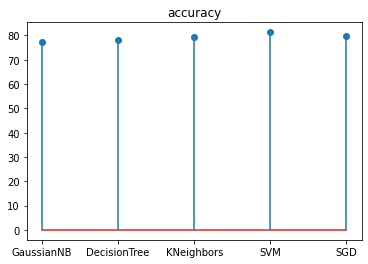

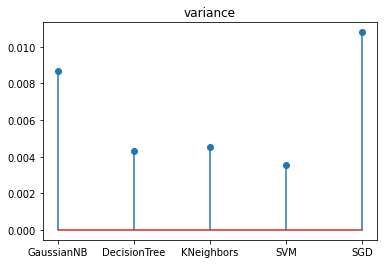

In [14]:
# use k-fold to train models

XX = scaler.transform(x_train)
#XX = x_train
#XX = pca.fit_transform(XX)
print(XX.shape)
y = y_train
print(y_train.shape)
n_splits = 5
scoring_method_f1 = make_scorer(lambda prediction, true_target: f1_score(true_target, prediction, average="weighted"))
scoring_method_accuracy = make_scorer(lambda prediction, true_target: accuracy_score(true_target, prediction))

performance = []
variance = []
label = ['GaussianNB','DecisionTree','KNeighbors','SVM','SGD' ]
for name, model in models.items():
    print(name)
    metrics_f1 = k_fold_fit_and_evaluate(XX, y, model, scoring_method_f1, n_splits=n_splits) 
    accuracy = k_fold_fit_and_evaluate(XX, y, model, scoring_method_accuracy, n_splits=n_splits) 
    performance.append(np.mean(accuracy))
    variance.append(np.std(accuracy))
    print("mean_f1", np.mean(metrics_f1))
    print("std_f1", np.std(metrics_f1))
    print("mean_acc", np.mean(accuracy))
    print("std_acc", np.std(accuracy))
axx = np.arange(len(performance))
plt.stem(axx, np.array(performance)*100)
plt.xticks(axx, label)
plt.title('accuracy')
plt.show()
plt.stem(axx, variance)
plt.xticks(axx, label)
plt.title('variance')
plt.show()

In [19]:
#use GridSearchCV to tune the hyper-parameter

scoring_method = make_scorer(lambda true_target, prediction: f1_score(true_target, prediction, average="weighted"))

model_parameters = {
    "GaussianNB": {
    
    },
    "DecisionTreeClassifier": {
        'max_depth': [None, 2, 5, 10, 15, 20, 30, 50, 100],
        'min_samples_leaf':[2, 8, 16, 32, 64, 128]
    },
    "KNeighborsClassifier": {
        'n_neighbors':[ 3, 9 , 15, 21, 27, 32, 40, 49, 55, 64],
        'weights':['distance', 'uniform']
    },
    "SVM": {
        'C':[10, 30, 50, 80, 100],
        'kernel':['linear', 'poly', 'rbf'],
        'degree':[3, 5 ,7 ,9, 11, 13],
        'gamma':['scale', 'auto', 0.1, 0.5, 1.0, 1.5]
    },
#     "SGDClassifier":{
#         'alpha':[5, 10, 20 ,30, 50, 100],
#         'eta0':[0.1, 0.3, 0.5, 0.8, 1.0],
#         'penalty':['none', 'l2', 'l1']
#     }
    "SGDClassifier":{
        'alpha':[3, 5, 10, 15, 20 ,30, 50, 100],
        'eta0':[0.01, 0.04, 0.06, 0.08, 0.1, 0.3, 0.5, 0.8, 1.0],
        'penalty':['none', 'l2', 'l1']
    }
}

bperformance = []
for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    #grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method_accuracy).fit(XX, y)
    grid_search = HalvingGridSearchCV(model, parameters,cv=cv, scoring=scoring_method_accuracy, n_jobs=-1, verbose=False, min_resources="exhaust", factor=3).fit(XX, y) 
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    bperformance.append(best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)

GaussianNB
- best_score = 0.7728959590736559
best paramters:
DecisionTreeClassifier
- best_score = 0.8212019461099704
best paramters:
- max_depth 30
- min_samples_leaf 32
KNeighborsClassifier
- best_score = 0.8168948041644404
best paramters:
- n_neighbors 9
- weights uniform


/usr/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


SVM
- best_score = 0.7946764406233309
best paramters:
- C 30
- degree 3
- gamma 1.0
- kernel rbf
SGDClassifier
- best_score = 0.8082129776119507
best paramters:
- alpha 10
- eta0 0.04
- penalty none


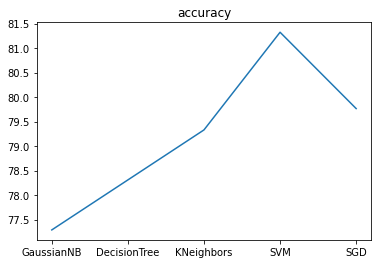

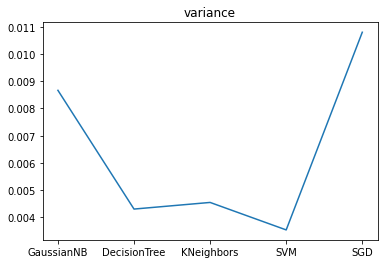

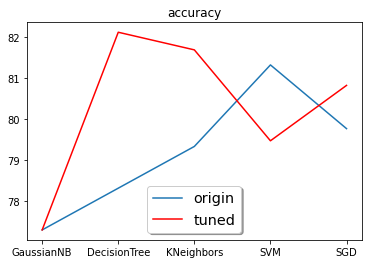

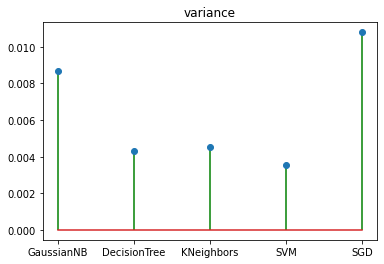

In [20]:
#plot the performance
plt.plot(axx, np.array(performance)*100)
plt.xticks(axx, label)
plt.title('accuracy')
plt.show()
plt.plot(axx, variance)
plt.xticks(axx, label)
plt.title('variance')
plt.show()


plt.figure()
plt.plot(axx, np.array(performance)*100,  label = 'origin')
plt.plot(axx, np.array(bperformance)  * 100, 'r', label = 'tuned')
plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xticks(axx, label)
plt.title('accuracy')
plt.show()

plt.figure()
plt.stem(axx, variance, 'g')
plt.stem
plt.xticks(axx, label)
plt.title('variance')
plt.show()

In [22]:
#check the performance
fm1 = DecisionTreeClassifier(max_depth=30, min_samples_leaf=32, random_state=random_state)
fm2 = KNeighborsClassifier(n_neighbors=9, weights="uniform")
#fm = models["DecisionTreeClassifier"]
fm1.fit(XX, y_train)
fm2.fit(XX, y_train)
xt = scaler.transform(x_test)
#xt = pca.transform(xt)
re1 = fm1.predict(XX)
re2 = fm2.predict(XX)
print(re1.shape)
count = 0
for i in range(0, re1.shape[0]):
    if(re1[i] == y_train[i]):
        count = count + 1
count = count/re1.shape[0]
print(count)

count2 = 0
for i in range(0, re2.shape[0]):
    if(re2[i] == y_train[i]):
        count2 = count2 + 1
count2 = count2/re1.shape[0]
print(count2)

(14707,)
0.8410280818657782
0.8498674100768342


In [24]:
#train PCA to find the best parameter
from sklearn.pipeline import Pipeline
p = {
  
    "PCA":{
        'n_components':[1, 2 ,3 ,4 ,5 ,6, 7, 8, 9]
    }
    
}

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca)])
param_grid = {
    "pca__n_components": [1, 2 ,3 ,4 ,5 ,6, 7, 8, 9, 10, 11]
}
for mn,para in p.items():
    cv = KFold(n_splits=5, random_state=random_state, shuffle=True)
    grid_search1 = GridSearchCV(pipe, param_grid, n_jobs=2).fit(XX, y)
    #grid_search1 = GridSearchCV(pca, para, cv=cv, n_jobs=-1, verbose=False).fit(XX, y)
    #grid_search = HalvingGridSearchCV(model, parameters,cv=cv, scoring=scoring_method, n_jobs=-1, verbose=False, min_resources="exhaust", factor=3).fit(XX, y) 
    best_model = grid_search1.best_estimator_
    best_score = grid_search1.best_score_
    best_params = grid_search1.best_params_
    
    print("- best_score =", best_score)
    #bperformance.append(best_score)
    print("best paramters:")
    for k,v in best_params.items():
         print("-", k, v)  
#pca = PCA(11)
pca.fit(XX)
print(pca.explained_variance_ratio_)

- best_score = -14.956139170620798
best paramters:
- pca__n_components 10
[0.20306913 0.13871658 0.11142936 0.10083003 0.08580487 0.08113893
 0.07734232 0.06764841 0.0534682  0.05077385]


In [21]:
#predict based on the test dataset
fm = DecisionTreeClassifier(max_depth=30, min_samples_leaf=32, random_state=random_state)
#fm = models["DecisionTreeClassifier"]
fm.fit(XX, y_train)
xt = scaler.transform(x_test)
#xt = pca.transform(xt)
re = fm.predict(xt)

In [23]:
# TODO
group_number = 66 # TODO replace this with the number of your group on Brightspace
predictions = re # TODO replace this with you own predictions

pd.DataFrame(predictions).to_csv(f"{group_number}_classes_problem_census.txt", index=False, header=False)